# Data Analysis


I get emails like this a lot:

>Do you think we could make a script so that we obtain a average & standard deviation of the iptm+ptm scores from the ranking_debug.json file?  
Currently, we calculate the average & standard deviation of the iptm+ptm scores obtained.  It seems that when a prediction is ‘good’, predictions converge on a common solution, iptm+ptm scores are consistently high with low STDEV as shown here: Average 0.61 +/- 0.031  
For a ‘poor’ prediction, iptm+ptm scores are low and predictions typically do not converge on a common solution, thus higher STDEV: Average 0.40 +/- 0.059.  
It would be nice if we could do this quickly, rather than calculating this by hand.  
Doable?

Every data analysis tool has certain patterns for common tasks.  In programming languages, we call these patterns *idioms*.  While there are lots of these, you only need a few to go really far in data analysis with python.  This request is a great example of how to combine a few idioms quickly to accomplish a task.  

First, we start with how to open a json file and use the `json` library to read it.

In [1]:
# Declare where the json file is
file_location = 'data/ranking_debug.good.json'

In [2]:
# import the json library
import json

In [3]:
## The 'with open...' idiom - this is how we open a file in Python.
with open(file_location) as f:
    # don't call the loaded data 'json'
    # if you do, you won't be able to use the json library again!
    json_data = json.load(f)  # load the data into a python 'dictionary'

In [4]:
# let's see what the sections of the json file are called
json_data.keys()

dict_keys(['iptm+ptm', 'order'])

In [5]:
# we know we want the iptm+ptm data
iptm_ptm_data = json_data['iptm+ptm']  # square brackets for accessing dictionaries

In [6]:
# let's see what the data look like
iptm_ptm_data

{'model_1_multimer_v3_pred_0': 0.6316470832444235,
 'model_1_multimer_v3_pred_1': 0.6258831533481526,
 'model_1_multimer_v3_pred_2': 0.6173820213450245,
 'model_1_multimer_v3_pred_3': 0.623750108675321,
 'model_1_multimer_v3_pred_4': 0.6426006787965258,
 'model_2_multimer_v3_pred_0': 0.5539110624672817,
 'model_2_multimer_v3_pred_1': 0.567765535300818,
 'model_2_multimer_v3_pred_2': 0.5515316461090136,
 'model_2_multimer_v3_pred_3': 0.5489417259407127,
 'model_2_multimer_v3_pred_4': 0.5523505271156173,
 'model_3_multimer_v3_pred_0': 0.6278652018879234,
 'model_3_multimer_v3_pred_1': 0.6393797685044162,
 'model_3_multimer_v3_pred_2': 0.6372601617642085,
 'model_3_multimer_v3_pred_3': 0.6466162368656975,
 'model_3_multimer_v3_pred_4': 0.6185590030539392,
 'model_4_multimer_v3_pred_0': 0.6317733921569164,
 'model_4_multimer_v3_pred_1': 0.624086164165649,
 'model_4_multimer_v3_pred_2': 0.6323795023321381,
 'model_4_multimer_v3_pred_3': 0.6266790132803765,
 'model_4_multimer_v3_pred_4': 0.6

So the data are a list of values paired to an id.  Recall that for 'mathy' lists, we use the `numpy` library, but for data analysis, we use the spreadsheet like library `pandas`.  We'll use `pandas` here.  For single lists in Pandas, we use a `Series`

In [7]:
import pandas as pd
data = pd.Series(iptm_ptm_data)

In [8]:
data

model_1_multimer_v3_pred_0    0.631647
model_1_multimer_v3_pred_1    0.625883
model_1_multimer_v3_pred_2    0.617382
model_1_multimer_v3_pred_3    0.623750
model_1_multimer_v3_pred_4    0.642601
model_2_multimer_v3_pred_0    0.553911
model_2_multimer_v3_pred_1    0.567766
model_2_multimer_v3_pred_2    0.551532
model_2_multimer_v3_pred_3    0.548942
model_2_multimer_v3_pred_4    0.552351
model_3_multimer_v3_pred_0    0.627865
model_3_multimer_v3_pred_1    0.639380
model_3_multimer_v3_pred_2    0.637260
model_3_multimer_v3_pred_3    0.646616
model_3_multimer_v3_pred_4    0.618559
model_4_multimer_v3_pred_0    0.631773
model_4_multimer_v3_pred_1    0.624086
model_4_multimer_v3_pred_2    0.632380
model_4_multimer_v3_pred_3    0.626679
model_4_multimer_v3_pred_4    0.626807
model_5_multimer_v3_pred_0    0.595805
model_5_multimer_v3_pred_1    0.619336
model_5_multimer_v3_pred_2    0.615180
model_5_multimer_v3_pred_3    0.601347
model_5_multimer_v3_pred_4    0.602144
dtype: float64

Remember that Pandas is for data analysis.  So we could ask our series to give us the mean or standard deviation:

In [9]:
print('Average:', data.mean(), '+/-', data.std())

Average: 0.6104392276796538 +/- 0.030921803616050316


... or we could take advantage of Pandas' data analyis tools:

In [10]:
data.describe()

count    25.000000
mean      0.610439
std       0.030922
min       0.548942
25%       0.601347
50%       0.623750
75%       0.631647
max       0.646616
dtype: float64

In [11]:
description = data.describe()
print('Average:', description['mean'], '+/-', description['std'])

Average: 0.6104392276796538 +/- 0.030921803616050316


### Exercise:
Harvest all the lines of code from above to read in the data and print out the average and standard deviation into one cell.  Remember to include the import statements.  Don't include any lines that just printed out information we used to understand what was going on.  

Once you're happy, go to the menu on the top and click on *Kernel -> Restart Kernel and Clear all outputs...*, then click *Restart*.  
You should then be able to run the cell and have it successfully print out the Average and standard deviation.  You should have a [1] next to your code box once you've run it (indicating that it's the first bit of code to run since the restart.

In [12]:
# Declare where the json file is
file_location = 'data/ranking_debug.good.json'

# import the json library
import json

## The 'with open...' idiom - this is how we open a file in Python.
with open(file_location) as f:
    # don't call the loaded data 'json'
    # if you do, you won't be able to use the json library again!
    json_data = json.load(f)  # load the data into a python 'dictionary'
    
# we know we want the iptm+ptm data
iptm_ptm_data = json_data['iptm+ptm']  # square brackets for accessing dictionaries

import pandas as pd
data = pd.Series(iptm_ptm_data)

print('Average:', data.mean(), '+/-', data.std())

Average: 0.6104392276796538 +/- 0.030921803616050316


### Exercise pt2:
To make them easier to read, Python scripts follow a loose format.  The main thing we want here is to move all the import statements to the top.  Do that now and make sure it runs by restarting the kernel again.

In [13]:
# import the json library
import json
import pandas as pd


# Declare where the json file is
file_location = 'data/ranking_debug.good.json'

## The 'with open...' idiom - this is how we open a file in Python.
with open(file_location) as f:
    # don't call the loaded data 'json'
    # if you do, you won't be able to use the json library again!
    json_data = json.load(f)  # load the data into a python 'dictionary'
    
# we know we want the iptm+ptm data
iptm_ptm_data = json_data['iptm+ptm']  # square brackets for accessing dictionaries

data = pd.Series(iptm_ptm_data)

print('Average:', data.mean(), '+/-', data.std())

Average: 0.6104392276796538 +/- 0.030921803616050316


### Bonus
Python has powerful string formatting.  Google "Python fstrings" and see if you can format your output a bit prettier.

In [14]:
print(f'Average: {data.mean():0.3f} +/- {data.std():0.3f}')

Average: 0.610 +/- 0.031


### Make it a script
We're most of the way to creating a Python script.  Let's make a useable one now.
1. Switch to the *Launcher* tab.  If you don't have one, on the menu on the top, click on *File -> New Launcher*
2. Under *Other*, click on *Python File*
3. Save the file as `iptm_analysis.py`
4. Copy all the code from exercise 2 into the file, then save the file.
5. Open a new launcher window and *Terminal* under *Other*
6. In the terminal, type in `python iptm_analysis.py` and hit enter.

## Make it more versatile
The one annoying thing about our script is that we have to change it every time to change the file name.  We *could* do some fancy parsing of the command line to make it a proper Linux-style tool - but that's way overkill.  

Python always has the list of commands used to start it stored in the `argv` variable of the `sys` module.  We'll use that as a simple way of making our script better.

1. Add `import sys` to the top of your script
2. Just below the imports, add `print(sys.argv)`
3. Save and run the script again

You should get: 
> `['iptm_analysis.py']`  

This means that `sys.argv` is a list of strings from the command line.  Call your script again with `python iptm_analysis.py Weeeee` and see what you get.

### Exercise
1. Change the print statement in your script so it only prints the second item (*hint: use* `sys.argv[1]`)
2. Re-run your script to see if it does what you expect.
3. Change the last item on the command line from `Weeee` to `data/ranking_debug.good.json`.
4. Re-run your script to see if it does what you expect.
5. Set the `file_location` varible to the value from `sys.argv[1]`
6. Add `print(file_location)` below where you set `file_location` to `sys.argv[1]`
7. Re-run your script to see if it does what you expect.
8. Run your script on `data/ranking_debug.poor.json`, see if it does what you expect.
9. Celebrate

# Summary statistics
We used .mean() and .std(), or the .describe() method, to get the mean and standard deviation of some data.  Let's see how to do some (slighly) more sophisticated analyses, i.e. **t-testing**.  

First we need to start with some data:

In [15]:
import pandas as pd
t_test_data = pd.DataFrame({'x'  : [10, 8, 13,9,11,14,6,4,12,7,5],
                            'I'  : [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68],'I'  : [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68],
                            'II' : [9.14, 8.14, 8.74, 8.77, 9.26, 8.1, 6.13, 3.1, 9.13, 7.26, 4.74],
                            'III': [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73],
                            # 'IV' : [6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.5, 5.56, 7.91, 6.89],
                           }
                          )
t_test_data

,x,I,II,III
0,10,8.04,9.14,7.46
1,8,6.95,8.14,6.77
2,13,7.58,8.74,12.74
3,9,8.81,8.77,7.11
4,11,8.33,9.26,7.81
5,14,9.96,8.10,8.84
6,6,7.24,6.13,6.08
7,4,4.26,3.10,5.39
8,12,10.84,9.13,8.15
9,7,4.82,7.26,6.42


### Exercise:
Find some way to display the mean and standard deviation for all four 'replicates'.

In [16]:
t_test_data.describe()

,x,I,II,III
count,11.000000,11.000000,11.000000,11.000000
mean,9.000000,7.500909,7.500909,7.500000
std,3.316625,2.031568,2.031657,2.030424
min,4.000000,4.260000,3.100000,5.390000
25%,6.500000,6.315000,6.695000,6.250000
50%,9.000000,7.580000,8.140000,7.110000
75%,11.500000,8.570000,8.950000,7.980000
max,14.000000,10.840000,9.260000,12.740000


... notice anything?  

Recall that the t-test requires *Normally* distributed data, ideally the data should have equal variance too, but we can get around that.  `scipy.stats` provides tools to check these things, so let's do that now, at least for the first and third datasets, starting with a test for Normality (called the Shapiro-Wilk test):

In [17]:
from scipy import stats

shapiro = stats.shapiro(t_test_data['I'])
if shapiro.pvalue < 0.05:
    n_string = 'NOT '
else:
    n_string = ''
print(f'The Shapiro-Wilk test for normality gives a p-value of: {shapiro.pvalue:0.3f} for I')
print(f'Suggesting that set I IS {n_string}Normally distributed.')

The Shapiro-Wilk test for normality gives a p-value of: 0.947 for I
Suggesting that set I IS Normally distributed.


In [18]:
shapiro = stats.shapiro(t_test_data['III'])
if shapiro.pvalue < 0.05:
    n_string = 'NOT '
else:
    n_string = ''
print(f'The Shapiro-Wilk test for normality gives a p-value of: {shapiro.pvalue:0.3f} for III')
print(f'Suggesting that set III IS {n_string}Normally distributed.')

The Shapiro-Wilk test for normality gives a p-value of: 0.026 for III
Suggesting that set III IS NOT Normally distributed.


... ok, so III isn't *quite* normally distributed, but 0.026 is really close to 0.05, right?  It's not, like, 0.005 or anything.  I'm sure it's close enough...  

Let's check for similar variance using the Bartlett test:

In [19]:
bartlett = stats.bartlett(t_test_data['I'], t_test_data['III'])
if bartlett.pvalue < 0.05:
    n_string = 'NOT '
else:
    n_string = ''
print(f'The Bartlet test for similar variance among samples: {bartlett.pvalue:0.3f} for I and III')
print(f'Suggesting that set I and III DO {n_string}have a similar variance.')

The Bartlet test for similar variance among samples: 0.999 for I and III
Suggesting that set I and III DO have a similar variance.


0.999!  
They must both be ok (right?)  We can even test for similar variance in non-Normal data with the Levene test:

In [20]:
levene = stats.levene(t_test_data['I'], t_test_data['III'])
if levene.pvalue < 0.05:
    n_string = 'NOT '
else:
    n_string = ''
print(f'The Levene test for similar variance among samples without assuming Normality: {levene.pvalue:0.3f} for I and III')
print(f'Suggesting that set I and III DO {n_string}have a similar variance.')

The Levene test for similar variance among samples without assuming Normality: 0.714 for I and III
Suggesting that set I and III DO have a similar variance.


... right!  So - similar variance means they're both good (right?)
Finally!  

Let's do the t-test:

In [21]:
t_test = stats.ttest_ind(t_test_data['I'], t_test_data['III'])
if t_test.pvalue < 0.05:
    n_string = 'NOT '
else:
    n_string = ''
print(f'The t-test has a p-value of: {t_test.pvalue:0.3f} for I and III')

The t-test has a p-value of: 0.999 for I and III


WOW!  They MUST be identical, right?

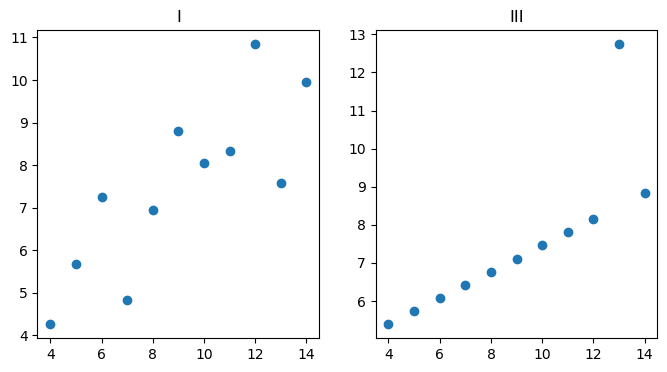

In [22]:
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(8,4))
plts = fig.subplots(ncols=2)

plts[0].scatter(t_test_data['x'], t_test_data['I'])
plts[0].set_title('I')
plts[1].scatter(t_test_data['x'], t_test_data['III'])
plts[1].set_title('III');

**Do you think those two datasets are the same?**  

*What did we do wrong?*

### Aside: Anscombe's Quartet  
Francis Anscombe constructed a quartet of datasets with both x- and y-values in 1973 as a demonstration of the importance of looking at your data, along with the effects of outliers and non-Normality.  His goal was to argue against the prevailing sentiment at the time that "numerical calculations are exact, but graphs are rough."

The full quartet looks like this:

In [23]:
anscombe_I = [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68]
anscombe_II = [9.14, 8.14, 8.74, 8.77, 9.26, 8.1, 6.13, 3.1, 9.13, 7.26, 4.74]
anscombe_III = [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73]
anscombe_IV = [6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.5, 5.56, 7.91, 6.89]

anscombe_x = [10, 8, 13,9,11,14,6,4,12,7,5]
anscombe_IV_x = [8, 8, 8, 8, 8, 8, 8, 19, 8, 8, 8]

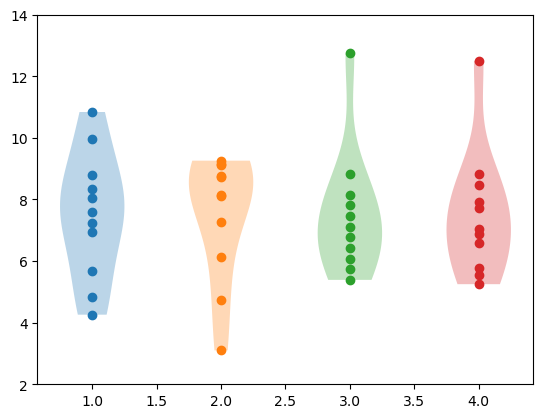

In [24]:
plt.violinplot(anscombe_I, [1], showextrema=False)
plt.scatter([1]*len(anscombe_I), anscombe_I)
plt.violinplot(anscombe_II, [2], showextrema=False)
plt.scatter([2]*len(anscombe_II), anscombe_II)
plt.violinplot(anscombe_III, [3], showextrema=False)
plt.scatter([3]*len(anscombe_III), anscombe_III)
plt.violinplot(anscombe_IV, [4], showextrema=False)
plt.scatter([4]*len(anscombe_IV), anscombe_IV)
plt.ylim(2,14);

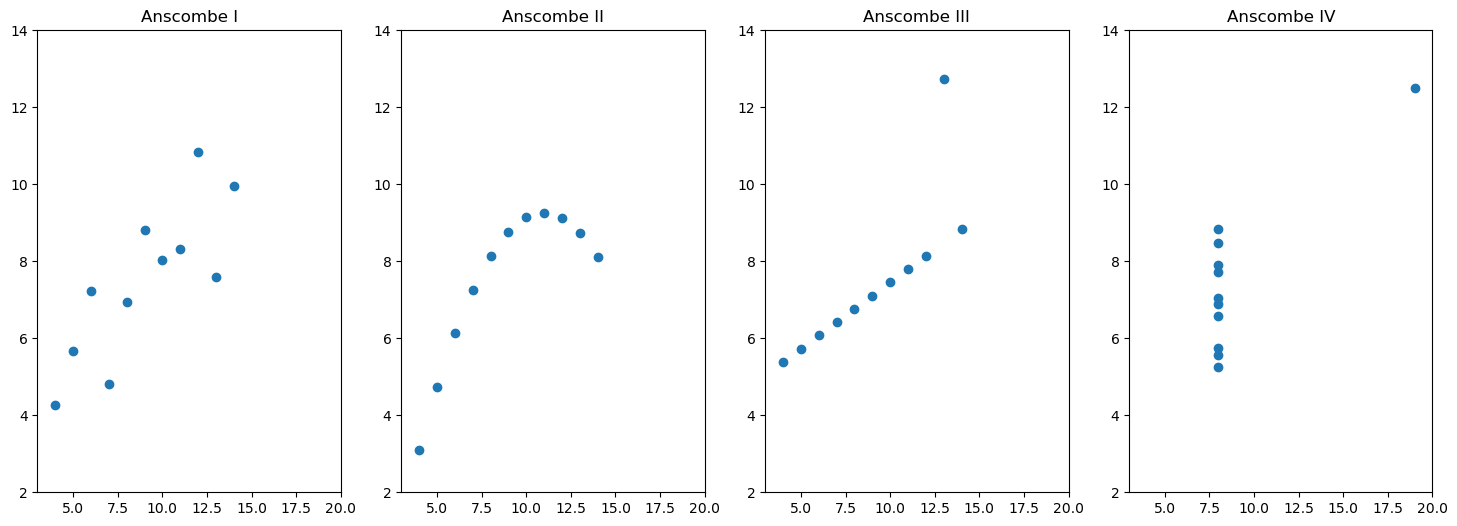

In [25]:
fig = plt.figure(figsize=(18,6))
plts = fig.subplots(ncols=4)
plts[0].scatter(anscombe_x, anscombe_I)
plts[0].set_title('Anscombe I')
plts[1].scatter(anscombe_x, anscombe_II)
plts[1].set_title('Anscombe II')
plts[2].scatter(anscombe_x, anscombe_III)
plts[2].set_title('Anscombe III')
plts[3].scatter(anscombe_IV_x, anscombe_IV)
plts[3].set_title('Anscombe IV')

for p in plts:
    p.set_xlim(3,20)
    p.set_ylim(2,14)

**ALWAYS LOOK AT YOUR DATA!**

# Fitting Data
Earlier, we played with a simple binding equation.  Let's now use one that's a better representation of experimental data.  We start with the equation for bimolecular $K_{d}$ for the reaction: $Protein + Ligand ⇌ Complex$  

$$ K_{d} = \frac{[Protein][Ligand]}{[Complex]} $$  

... but, recall that we only know the initial concentrations $[Protein]_0$ and $[Ligand]_0$, and not the concentrations when we come to equilibrium.  We had to assume that the $Protein$ concentration was very high relative to both the $Ligand$ concentration and $K_d$, and that let us use a simplified version of the equation.  Here's the full equation without those assumptions:

$$\large [Complex] = \scriptsize \frac{K_{d} + [ligand]_{0} + [protein]_{0} - \sqrt{K_{d}^{2} + 2 K_{d} [ligand]_{0} + 2 K_{d} [protein]_{0} + [ligand]_{0}^{2} - 2 [ligand]_{0} [protein]_{0} + [protein]_{0}^{2}}}{2} $$  

So you can see why the simplified form is more commonly used:  

$$\large [Complex] = \normalsize \frac{[Ligand]}{K_d+[Ligand]}$$  

## Exercise
The skeleton of a function to calculate the amount of $Complex$ formed is below.
1. Fill in the missing part (???) in the first box.
2. The second box acts as a check to see if you've done it right.  Run it and see if you get answers that make sense.

In [26]:
def simple_binding(ligand, kd):
    c = ligand / (kd + ligand)
    return c

In [27]:
ligand = 0
kd = 1
print('This should be no complex formation:', simple_binding(ligand, kd))

ligand = 0
kd = 1000
print('This should be no complex formation:', simple_binding(ligand, kd))

ligand = 1000
kd = 1
print('This should be close to 1.0:', simple_binding(ligand, kd))

ligand = 1000
kd = 1000
print('This should be 0.5:', simple_binding(ligand, kd))

This should be no complex formation: 0.0
This should be no complex formation: 0.0
This should be close to 1.0: 0.999000999000999
This should be 0.5: 0.5


Now that we've done some basic checks on our code, we can make some plots.  In order to do so, we need to import a few libraries: `numpy` and `matplotlib`'s `pyplot`

In [28]:
import numpy as np
from matplotlib import pyplot as plt

Next, we're going to plot the complex formation as a function of ligand concentration, so lets use `numpy` to make an array of ligand concentration values from 1 to 100 (note that we can't use units in `numpy` - we'll just have to be scientists ourselves!):

In [29]:
ligand_concentrations = np.linspace(0, 10, 5)
ligand_concentrations

array([ 0. ,  2.5,  5. ,  7.5, 10. ])

Next, we use those ligand concentrations and our function from earlier to get the [complex] formed.  We'll pick an arbitrary $K_d$.  
*Note how using a numpy array makes doing lots of math easier!*

In [30]:
kd = 1
complex_concentrations = simple_binding(ligand_concentrations, kd)
complex_concentrations

array([0.        , 0.71428571, 0.83333333, 0.88235294, 0.90909091])

Finally, we plot our binding curve:

Text(0, 0.5, 'Fraction Bound')

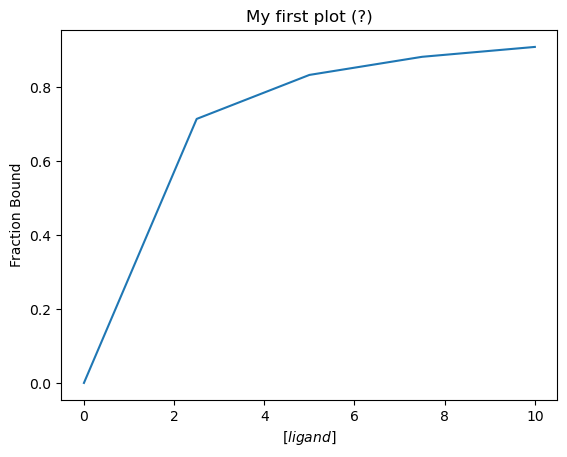

In [31]:
plt.plot(ligand_concentrations, complex_concentrations)
plt.title('My first plot (?)')
plt.xlabel('$[ligand]$')
plt.ylabel('Fraction Bound')

## Exercise
That plot looks ugly.  Make a list of 1000 ligand concentrations and re-plot with that.  
*Hint: type `np.linspace?` in a cell to see what the parameters for linspace are.  Alternatively, google "numpy linspace"*

Text(0, 0.5, 'Fraction Bound')

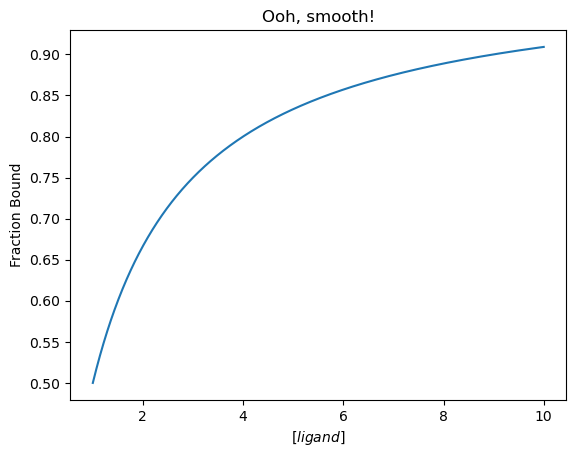

In [32]:
kd = 1
ligand_concentrations = np.linspace(1, 10, 1000)
complex_concentrations = simple_binding(ligand_concentrations, kd)
plt.plot(ligand_concentrations, complex_concentrations)
plt.title('Ooh, smooth!')
plt.xlabel('$[ligand]$')
plt.ylabel('Fraction Bound')

### Exercise (cont.)
1. Copy the plotting code from the cell above.
2. Save the plot you just made using `plt.savefig('myplot.png')`
3. Double-click on the new file in the file brower on the left side of this page.
4. Save the figure in another format (e.g. pdf) by changing the extention.

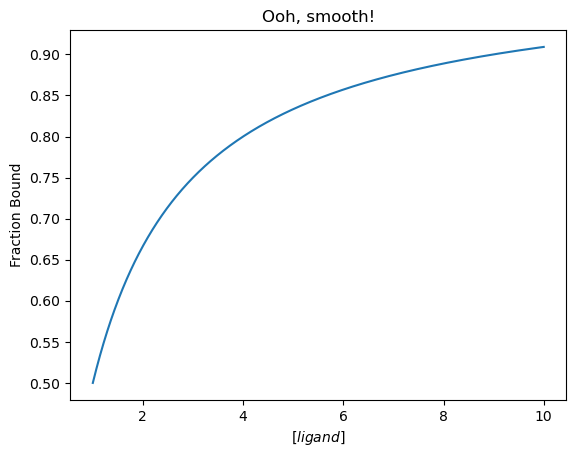

In [33]:
# Save figure as png file
kd = 1
ligand_concentrations = np.linspace(1, 10, 1000)
complex_concentrations = simple_binding(ligand_concentrations, kd)
plt.plot(ligand_concentrations, complex_concentrations)
plt.title('Ooh, smooth!')
plt.xlabel('$[ligand]$')
plt.ylabel('Fraction Bound')
plt.savefig('myplot.png')

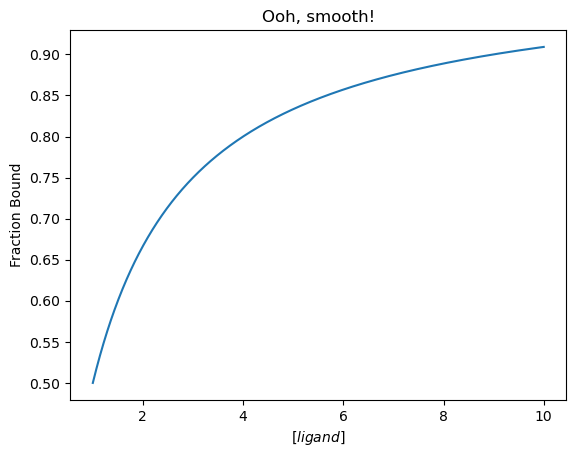

In [34]:
# Save figure as another format (pdf, etc...)
kd = 1
ligand_concentrations = np.linspace(1, 10, 1000)
complex_concentrations = simple_binding(ligand_concentrations, kd)
plt.plot(ligand_concentrations, complex_concentrations)
plt.title('Ooh, smooth!')
plt.xlabel('$[ligand]$')
plt.ylabel('Fraction Bound')
plt.savefig('myplot.pdf')
plt.savefig('myplot.ps')  # PostScript.  Good for publishing
plt.savefig('myplot.tiff')
plt.savefig('myplot.jpg')

### On to data
The Excel spreadsheet `.xlsx` has our data - but how to read it?  *Pandas* to the rescue!

In [35]:
# Pandas requires an additional component called openpyxl to read xls and xlsx files.
# Uncomment and run the line below if you get an error about missing openpyxl - you only need to do this once.

!pip install openpyxl

In [36]:
excel_file = 'data/binding_data.xlsx'

import pandas as pd
binding_data = pd.read_excel(excel_file)
binding_data

,[ligand],complex formed
0,0.0,0.000
1,0.1,0.489
2,0.2,0.764
3,0.5,0.977
4,1.0,0.946


### Exercise
Using the lecture notes as an example, make a scatter plot of your data 

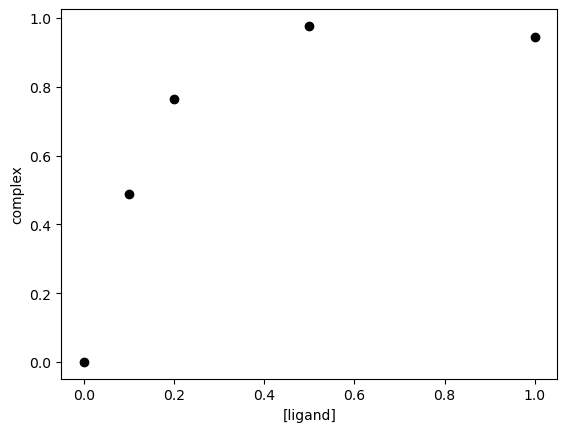

In [37]:
plt.scatter(binding_data['[ligand]'], binding_data['complex formed'], color='black')
plt.xlabel('[ligand]')
plt.ylabel('complex');

### Exercise
1. Using the lecture notes as an example, import `curve_fit` and fit your data to `simple_binding` function you defined earlier.  
2. Calculate the standard deviations.
3. Print the results.

In [38]:
# step 1
from scipy.optimize import curve_fit
def simple_binding(ligand, kd):
    c = ligand / (kd + ligand)
    return c

fitted_parameters, covariance_matrix = curve_fit(simple_binding,
                                                 binding_data['[ligand]'],
                                                 binding_data['complex formed'])

In [39]:
# step 2
standard_deviations = np.sqrt(np.diag(covariance_matrix))

In [40]:
# step 3
print('The parameters for simple_binding are:', fitted_parameters)
print('The standard deviations on the parameters are:', standard_deviations)

The parameters for simple_binding are: [0.07481828]
The standard deviations on the parameters are: [0.01549413]


### Exercise (cont.)
4. Use `np.linspace` to make 1000 ligand concentrations from the minium to maximum values in your Excel file.
5. Use the fitted $K_d$ value from `curve_fit`, along with your 1000 concentration values, to plot a 'fitted curve'
6. Add the scatter plot.

In [41]:
# step 4
x = np.linspace(min(binding_data['[ligand]']),
                max(binding_data['[ligand]']),
                1000)

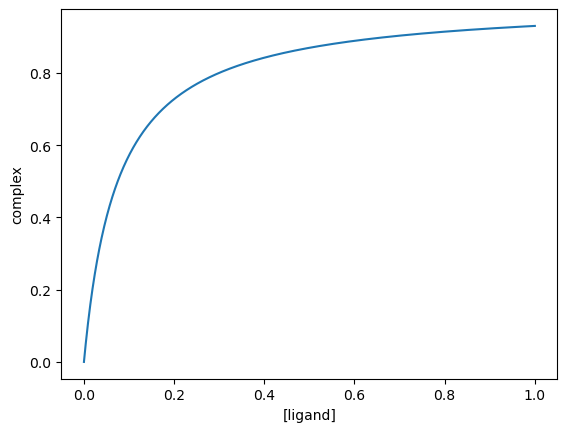

In [42]:
# step 5
fitted_curve = simple_binding(x, fitted_parameters[0])
plt.plot(x, fitted_curve)
plt.xlabel('[ligand]')
plt.ylabel('complex');

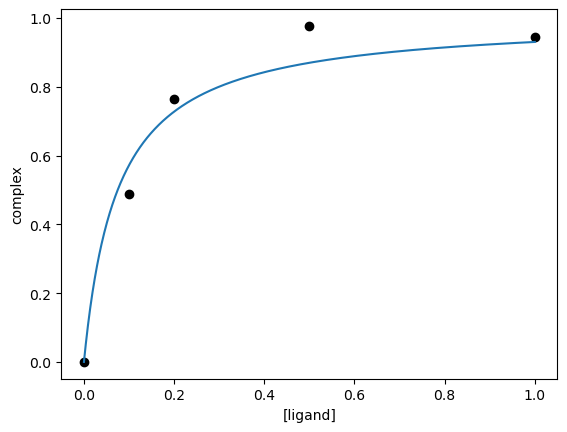

In [43]:
# step 6
plt.plot(x, fitted_curve)
plt.scatter(binding_data['[ligand]'], binding_data['complex formed'], color='black')
plt.xlabel('[ligand]')
plt.ylabel('complex');

### Exercise (bonus)
Using the lecture slides as a reference, shade ± two standard deviations

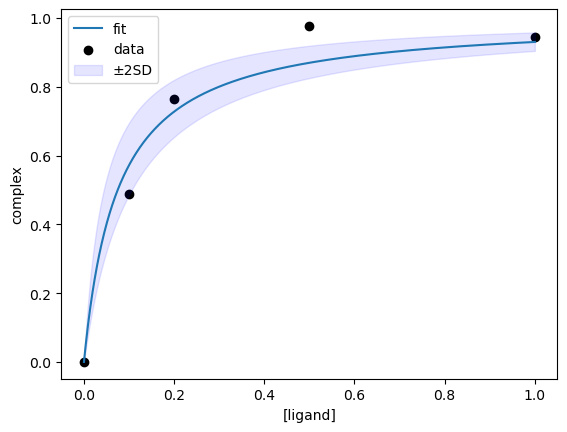

In [44]:
plt.plot(x, fitted_curve, label='fit')
plt.scatter(binding_data['[ligand]'], binding_data['complex formed'], color='black', label='data')
plt.xlabel('[ligand]')
plt.ylabel('complex');

plus_2sd_kd  = fitted_parameters[0] + 2 * standard_deviations[0]
minus_2sd_kd = fitted_parameters[0] - 2 * standard_deviations[0]

bound_upper = simple_binding(x, minus_2sd_kd)
bound_lower = simple_binding(x, plus_2sd_kd)
plt.fill_between(x, bound_upper, bound_lower, color = 'blue', alpha = 0.1, label='±2SD')
plt.legend();